In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv
/kaggle/input/covid19-global-forecasting-week-1/train.csv


In [2]:
x=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')
x_test=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/test.csv')

In [3]:
x.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
x.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000
mean,13191.000000,26.287693,4.766191,309.712347,11.187074
std,7624.677906,22.935102,79.923297,3457.507200,164.362887
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.000000,13.145425,-71.516375,0.000000,0.000000
50%,13191.000000,32.985550,9.775000,0.000000,0.000000
75%,19786.000000,42.501575,64.688975,9.000000,0.000000
max,26381.000000,71.706900,174.886000,67800.000000,6077.000000


In [5]:
x.isnull().sum()

Id                   0
Province/State    9548
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [6]:
x.corr()

,Id,Lat,Long,ConfirmedCases,Fatalities
Id,1.000000,0.167879,-0.454948,-0.053347,-0.039255
Lat,0.167879,1.000000,-0.223177,0.031753,0.025130
Long,-0.454948,-0.223177,1.000000,0.082600,0.059153
ConfirmedCases,-0.053347,0.031753,0.082600,1.000000,0.937714
Fatalities,-0.039255,0.025130,0.059153,0.937714,1.000000


In [7]:
x1=x.iloc[:,3:5]
x_test2=x_test.iloc[:,3:5]

In [8]:
x_test.isnull().sum()

ForecastId           0
Province/State    6622
Country/Region       0
Lat                  0
Long                 0
Date                 0
dtype: int64

In [9]:
x1

,Lat,Long
0,33.0000,65.0000
1,33.0000,65.0000
2,33.0000,65.0000
3,33.0000,65.0000
4,33.0000,65.0000
...,...,...
17603,-15.4167,28.2833
17604,-15.4167,28.2833
17605,-15.4167,28.2833
17606,-15.4167,28.2833


In [10]:
from fancyimpute import IterativeImputer as MICE

Using TensorFlow backend.


In [11]:
x1_c = list(x1)

In [12]:
x1_c

['Lat', 'Long']

In [13]:
y=MICE()

In [14]:
x2 = pd.DataFrame(y.fit_transform(x1))

In [15]:
x_test3=pd.DataFrame(y.transform(x_test2))

In [16]:
x2

,0,1
0,33.0000,65.0000
1,33.0000,65.0000
2,33.0000,65.0000
3,33.0000,65.0000
4,33.0000,65.0000
...,...,...
17603,-15.4167,28.2833
17604,-15.4167,28.2833
17605,-15.4167,28.2833
17606,-15.4167,28.2833


In [17]:
x2.columns=x1_c
x_test3.columns=x1_c

In [18]:
x2.isnull().sum()

Lat     0
Long    0
dtype: int64

In [19]:
x_test3.isnull().sum()

Lat     0
Long    0
dtype: int64

In [20]:
x['Lat']=x2['Lat']
x_test['Lat']=x_test3['Lat']

In [21]:
x['Long']=x2['Long']
x_test['Long']=x_test3['Long']

In [22]:
x.isnull().sum()

Id                   0
Province/State    9548
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [23]:
x['Date']=pd.to_datetime(x['Date'])
x_test['Date']=pd.to_datetime(x_test['Date'])

In [24]:
x['Date'].describe()

count                   17608
unique                     62
top       2020-01-25 00:00:00
freq                      284
first     2020-01-22 00:00:00
last      2020-03-23 00:00:00
Name: Date, dtype: object

In [25]:
from datetime import date

In [26]:
mindate=x['Date'].min()

In [27]:
mindate

Timestamp('2020-01-22 00:00:00')

In [28]:
z=x['Date']-mindate

In [29]:
for i in range(len(z)):
    z[i]=int(str(z[i]).split()[0])

In [30]:
x['Date']=z

In [31]:
x

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0000,65.0000,0,0.0,0.0
1,2,NaN,Afghanistan,33.0000,65.0000,1,0.0,0.0
2,3,NaN,Afghanistan,33.0000,65.0000,2,0.0,0.0
3,4,NaN,Afghanistan,33.0000,65.0000,3,0.0,0.0
4,5,NaN,Afghanistan,33.0000,65.0000,4,0.0,0.0
...,...,...,...,...,...,...,...,...
17603,26377,NaN,Zambia,-15.4167,28.2833,57,2.0,0.0
17604,26378,NaN,Zambia,-15.4167,28.2833,58,2.0,0.0
17605,26379,NaN,Zambia,-15.4167,28.2833,59,2.0,0.0
17606,26380,NaN,Zambia,-15.4167,28.2833,60,3.0,0.0


In [32]:
c=x_test['Date']-mindate

In [33]:
for i in range(len(c)):
    c[i]=int(str(c[i]).split()[0])

In [34]:
c

0        50
1        51
2        52
3        53
4        54
         ..
12207    88
12208    89
12209    90
12210    91
12211    92
Name: Date, Length: 12212, dtype: object

In [35]:
x_test['Date']=c

In [36]:
x['Date']=x['Date'].astype(int)

In [37]:
x_test['Date']=x_test['Date'].astype(int)

In [38]:
x_test

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0000,65.0000,50
1,2,NaN,Afghanistan,33.0000,65.0000,51
2,3,NaN,Afghanistan,33.0000,65.0000,52
3,4,NaN,Afghanistan,33.0000,65.0000,53
4,5,NaN,Afghanistan,33.0000,65.0000,54
...,...,...,...,...,...,...
12207,12208,NaN,Zambia,-15.4167,28.2833,88
12208,12209,NaN,Zambia,-15.4167,28.2833,89
12209,12210,NaN,Zambia,-15.4167,28.2833,90
12210,12211,NaN,Zambia,-15.4167,28.2833,91


In [39]:
y1_val=x.iloc[:,-2]

In [40]:
y1_val=y1_val.astype(int)

In [41]:
y2_val=x.iloc[:,-1]

In [42]:
y2_val=y2_val.astype(int)

In [43]:
x_val=x.drop(['ConfirmedCases','Fatalities'],axis=1)

In [44]:
x_val

,Id,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0000,65.0000,0
1,2,NaN,Afghanistan,33.0000,65.0000,1
2,3,NaN,Afghanistan,33.0000,65.0000,2
3,4,NaN,Afghanistan,33.0000,65.0000,3
4,5,NaN,Afghanistan,33.0000,65.0000,4
...,...,...,...,...,...,...
17603,26377,NaN,Zambia,-15.4167,28.2833,57
17604,26378,NaN,Zambia,-15.4167,28.2833,58
17605,26379,NaN,Zambia,-15.4167,28.2833,59
17606,26380,NaN,Zambia,-15.4167,28.2833,60


In [45]:
z=x.corr()

In [46]:
import seaborn as sns;

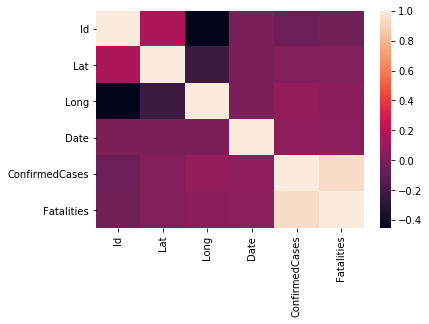

In [47]:
sns.heatmap(z)

In [48]:
# for i in range(len(x)):
z=x_val['Province/State'].isna()


In [49]:
z1=x_test['Province/State'].isna()

In [50]:
for i in range(len(z1)):
       if z1[i]==True:
            x_test['Province/State'][i]=x_test['Country/Region'][i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
x_test.isna().sum()

ForecastId        0
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
dtype: int64

In [52]:
for i in range(len(z)):
       if z[i]==True:
            x_val['Province/State'][i]=x_val['Country/Region'][i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
x_val.isnull().sum()

Id                0
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
dtype: int64

In [54]:
x.drop(['ConfirmedCases','Fatalities'],axis=1,inplace=True)

In [55]:
x

,Id,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0000,65.0000,0
1,2,NaN,Afghanistan,33.0000,65.0000,1
2,3,NaN,Afghanistan,33.0000,65.0000,2
3,4,NaN,Afghanistan,33.0000,65.0000,3
4,5,NaN,Afghanistan,33.0000,65.0000,4
...,...,...,...,...,...,...
17603,26377,NaN,Zambia,-15.4167,28.2833,57
17604,26378,NaN,Zambia,-15.4167,28.2833,58
17605,26379,NaN,Zambia,-15.4167,28.2833,59
17606,26380,NaN,Zambia,-15.4167,28.2833,60


In [56]:
x_val.isnull().sum()

Id                0
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
dtype: int64

In [57]:
xx=pd.get_dummies(x_val)

In [58]:
x_predfinal=pd.get_dummies(x_test)

In [59]:
x_predfinal

,ForecastId,Lat,Long,Date,Province/State_Afghanistan,Province/State_Alabama,Province/State_Alaska,Province/State_Albania,Province/State_Alberta,Province/State_Algeria,...,Country/Region_Turkey,Country/Region_US,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia
0,1,33.0000,65.0000,50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,33.0000,65.0000,51,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.0000,65.0000,52,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,33.0000,65.0000,53,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,33.0000,65.0000,54,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,12208,-15.4167,28.2833,88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12208,12209,-15.4167,28.2833,89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12209,12210,-15.4167,28.2833,90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12210,12211,-15.4167,28.2833,91,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
xx

,Id,Lat,Long,Date,Province/State_Afghanistan,Province/State_Alabama,Province/State_Alaska,Province/State_Albania,Province/State_Alberta,Province/State_Algeria,...,Country/Region_Turkey,Country/Region_US,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia
0,1,33.0000,65.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,33.0000,65.0000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.0000,65.0000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,33.0000,65.0000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,33.0000,65.0000,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,26377,-15.4167,28.2833,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17604,26378,-15.4167,28.2833,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17605,26379,-15.4167,28.2833,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17606,26380,-15.4167,28.2833,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


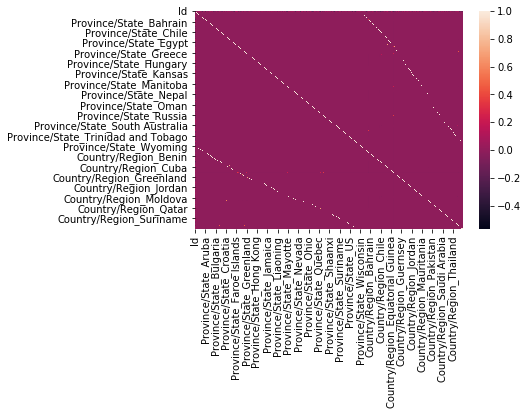

In [61]:
sns.heatmap(xx.corr())

In [62]:
# xx.to_csv('hihi.csv')

In [63]:
from sklearn.ensemble import BaggingRegressor

In [64]:
from sklearn import tree

In [65]:

from sklearn.model_selection import train_test_split


In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xx, y1_val, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(xx, y2_val, test_size=0.2)

In [67]:
X_test1

,Id,Lat,Long,Date,Province/State_Afghanistan,Province/State_Alabama,Province/State_Alaska,Province/State_Albania,Province/State_Alberta,Province/State_Algeria,...,Country/Region_Turkey,Country/Region_US,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_Zambia
2121,3176,53.9333,-116.5765,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13913,20858,27.7663,-81.6868,25,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16551,24798,18.3358,-64.8963,59,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6432,9626,-17.6797,149.4068,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13902,20847,27.7663,-81.6868,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,6716,31.2020,121.4491,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11834,17725,24.0000,45.0000,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17397,26078,41.3775,64.5853,37,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12773,19160,-6.3690,34.8888,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

In [69]:
model.fit(X_train1, y_train1)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True

In [70]:
model.score(X_test1,y_test1)

0.9931558863688736

In [71]:
# mio=pd.read_csv('')

In [72]:
anssss=model.predict(x_predfinal)

In [73]:
anssss

array([ 6.2, 11.8, 11.8, ...,  3.9,  3.9,  3.9])

In [74]:
a1=np.around(anssss)

In [75]:
a1=a1.astype(int)

In [76]:
a1

array([ 6, 12, 12, ...,  4,  4,  4])

In [77]:
model2 = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

In [78]:
model2.fit(X_train2, y_train2)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True

In [79]:
model2.score(X_test2,y_test2)

0.9968037680428826

In [80]:
anzzzz=model2.predict(x_predfinal)

In [81]:
a2=np.around(anzzzz)

In [82]:
a2=a2.astype(int)

In [83]:
predictions = pd.DataFrame({'ForecastId':x_test['ForecastId'],'ConfirmedCases':a1,'Fatalities':a2})
predictions.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,6,0
1,2,12,0
2,3,12,0
3,4,19,0
4,5,17,0


In [84]:
# predictions.to_csv('submission.csv', header=True, index=False)

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
model3 = AdaBoostRegressor()
model4 = AdaBoostRegressor()

In [87]:
model3.fit(X_train1, y_train1)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [88]:
model4.fit(X_train2, y_train2)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [89]:
model3.score(X_test1,y_test1)

0.5192122545426225

In [90]:
model4.score(X_test2,y_test2)

0.9086710375020897

In [91]:
import xgboost as xgb

In [92]:
model5=xgb.XGBRegressor()

In [93]:
model6=xgb.XGBRegressor()

In [94]:
X_train1.rename(columns = {'Id':'ForecastId'}, inplace = True) 
X_test1.rename(columns = {'Id':'ForecastId'}, inplace = True) 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [95]:
X_train2.rename(columns = {'Id':'ForecastId'}, inplace = True) 
X_test2.rename(columns = {'Id':'ForecastId'}, inplace = True) 

In [96]:
model5.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [97]:
model6.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [98]:
model5.score(X_test1,y_test1)

0.9919576597932448

In [99]:
model6.score(X_test2,y_test2)

0.9942001842219645

In [100]:
ank=model5.predict(x_predfinal)
annk=model6.predict(x_predfinal)

a4=np.around(ank)
a4=a4.astype(int)

a5=np.around(annk)
a5=a5.astype(int)

predictions2 = pd.DataFrame({'ForecastId':x_test['ForecastId'],'ConfirmedCases':a4,'Fatalities':a5})
predictions2.to_csv('submission.csv', header=True, index=False)
predictions2.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,7,0
1,2,25,0
2,3,49,0
3,4,40,0
4,5,63,0


In [101]:
x_test

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,Afghanistan,Afghanistan,33.0000,65.0000,50
1,2,Afghanistan,Afghanistan,33.0000,65.0000,51
2,3,Afghanistan,Afghanistan,33.0000,65.0000,52
3,4,Afghanistan,Afghanistan,33.0000,65.0000,53
4,5,Afghanistan,Afghanistan,33.0000,65.0000,54
...,...,...,...,...,...,...
12207,12208,Zambia,Zambia,-15.4167,28.2833,88
12208,12209,Zambia,Zambia,-15.4167,28.2833,89
12209,12210,Zambia,Zambia,-15.4167,28.2833,90
12210,12211,Zambia,Zambia,-15.4167,28.2833,91


In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
y_predmodel5=model5.predict(X_test1)

In [104]:
y_predmodel5

array([ -3.7245564,  11.273885 ,  78.79712  , ...,  -8.922295 ,
        -3.0125294, -11.5402355], dtype=float32)

In [105]:
mean_squared_error(y_test1, y_predmodel5)

61976.53894137066